# Module 9

In [1]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import skimage as ski
import skimage.filters
import skimage.segmentation
import preprocess_bacteria as prp
import imageio as img
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')
import ipywidgets as widgets
from IPython.display import display

In [2]:
plate_no = 7

In [3]:
image_file = 'Plates/plate_'+str(plate_no)+'.jpg'
figfile = 'bacterial_colonies/'

In [4]:
pic = ski.color.rgb2gray(img.imread(image_file)).astype('double')
if ((plate_no == 6)|(plate_no == 3)): labelled = prp.preprocessor(pic,sigma=5,op_sz = 1)
else: labelled = prp.preprocessor(pic)

In [5]:
overlayed = ski.color.label2rgb(labelled,image=pic,bg_label=0)

In [6]:
properties = ['label', 'area', 'eccentricity']
props = pd.DataFrame(ski.measure.regionprops_table(labelled.astype('int'),properties = properties))

# Setting up GUI
By selecting bacterial colonies you can generate training datasets.

In [7]:
def val_shower(im):
    return lambda x,y: '%dx%d = %d' % (x,y,im[int(y),int(x)])

def selector(event):
    lab = (np.round(np.array(([event.xdata,event.ydata])))).astype('int')
    val = labelled[lab[1],lab[0]]
    sel_label = np.zeros(np.shape(labelled))
    if ((val>0) & (val not in sel)): 
        sel.append(val)
        sel_label = np.where(labelled==val,1.0,sel_label)
        ax.contour(sel_label,cmap='gray_r')
        
def resetter(b):
    with output1:
        plt.cla()
        ax.imshow(overlayed)
        col = np.zeros(np.shape(labelled))
        bac = np.array(props['label'].loc[props['bacteria']==1])
        for i in np.array(bac):
            col = np.where(labelled==i,1.0,col)
        ax.contour(col,cmap='Reds')
        global sel
        sel = []
        
def colonizer(b):
    with output2:
        col = np.zeros(np.shape(labelled))
        bac = props['bacteria'].copy()
        for i in np.array(sel):
            col = np.where(labelled==i,1.0,col)
            bac.loc[props['label']==i] = 1
        ax.contour(col,cmap='Reds')
        props['bacteria'] = bac

Run the cell below to reset the non-bacterial objects to be all labelled regions. `reset selection` clears selections. `bacteria` commits selections as bacterial objects.

<IPython.core.display.Javascript object>


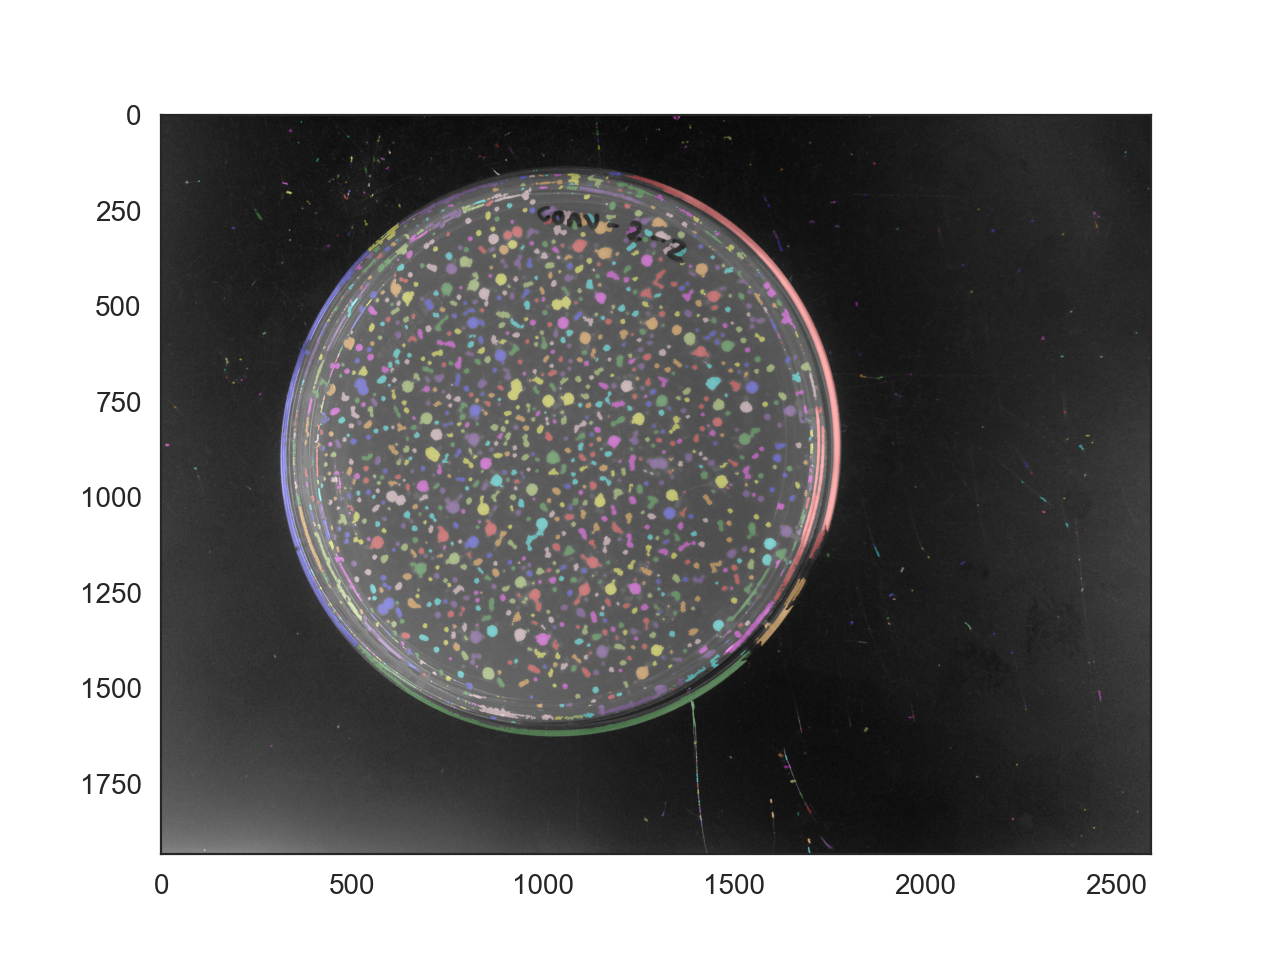

In [8]:
props['bacteria'] = np.zeros(np.shape(props)[0])

fig,ax = plt.subplots()    
myax = ax.imshow(overlayed)

ax.format_coord = val_shower(labelled)

global sel
sel = []
fig.canvas.mpl_connect('button_press_event', selector)
fig.show()

#reset button
button1 = widgets.Button(description="reset selection")
output1 = widgets.Output()


#not bacteria button
button2 = widgets.Button(description="bacteria")
output2 = widgets.Output()

button1.on_click(resetter)
button2.on_click(colonizer)

buttons = widgets.VBox(children=[button1, button2])
all_widgets = widgets.HBox(children=[buttons, output1, output2])
display(all_widgets)

In [9]:
props.to_csv(figfile+'bacterial_colony_'+str(plate_no)+'.csv')
np.savetxt(figfile+'labelled_colony_'+str(plate_no)+'.csv', labelled)